<a href="https://colab.research.google.com/github/BreakoutMentors/Data-Science-and-Machine-Learning/blob/master/machine_learning/lesson%201%20-%20linear%20regression/examples/simple_linear_regression_what_makes_us_happy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# D

# Regression
<figure>
<img src='https://media.makeameme.org/created/brace-yourself-regression-599599.jpg' width='50%' height='50%'></img>
</figure>


Perhaps the most natural machine learning task to wrap our heads around is *regression*--a set of methods for modeling the relationship between one or more independent variables (i.e., $x$) and a dependent variable (i.e., $y$). Regression problems pop up whenever we want to output a *numeric* value. 

Most applications of regression fall into one of the following two broad categories:
- *inference* - to explain the relationship between the inputs and outputs (most common).
- *prediction* - to predict numeric outputs given inputs (most common in machine learning). 

A few everyday examples of regression include predicting prices (of homes, stocks, etc.), predicting length of stay (for patients in the hospital), and demand forecasting (for retail sales). 

## Linear Regression
*Linear regression* is probably the simplest and most popular regression method. It is called "linear" regression because we **assume** that the relationship between the independent variables $x$ and the dependent variable  $y$ is linear--that is, $y$ can be expressed as a *weighted sum* of the elements in $x$, plus some *noise* in the data. In mathematical terms this can be expressed as: $$y = wx + b$$
where $w$ represents the learnable *weights* and $b$ the *bias* (i.e., you may recognize it as the *intercept*). The weights determine the influence of each feature on the prediction and the bias tells us what the predicted value would be if all the features $x$ values were 0. Given features of a training dataset  X  and corresponding (known) labels  y , the goal of linear regression is to find the weight vector  w  and the bias term  b  that given features of a new data instance sampled from the same distribution as  X , the new data instance’s label will (in expectation) be predicted with the lowest error.

To motivate the linear regression approach, suppose that we wish to estimate the prices of houses (in dollars) based on their area (in square feet). To actually fit a model for *predicting* house prices, we need to get our hands on a dataset consisting of sales for which we know the sale price and area for each home. In machine learning terminology, the dataset is called a *training dataset* or *training set*, and each row (the data corresponding to one sale) is called a *sample*. The thing we are trying to predict (price) is called a *label* (or *target*). The independent variables (only one in this case--area), upon which the predictions are based, are called *features*. 

Generally, we will use  $n$  to denote the total number of samples in our dataset. We index a sample by $i$, denoting each sample as  $x^{(i)}=[x^{(i)}_{1}]^{⊤}$  ($x^{(i)}_{1}$ representing the area) and the corresponding label as $y^{(i)}$.


## Linear Model


To make the above linear regression formula more concrete, let's translate it to our house prices example: 
$$\text{price} = w_{\text{area}}\cdot{area} + b $$
where $w_{\text{area}}$ is the learnable *weight* and $b$ is the *bias* (or *intercept*).

The goal is to choose the weight  $w$  and the bias  b  such that on average, the predictions made according to our model *best fit* the true prices observed in the data.

# What makes us happy?

That's the question we'll try to answer in this notebook. But how? The first step is to find a dataset related to our question. The World Happiness (https://www.kaggle.com/unsdsn/world-happiness) dataset happens to be a great option so we'll us it here. The dataset contains information about the state of global happiness with happiness scores and rankings for almost every country on earth. Pretty cool right!

We want to find out what makes us happy. We will use sinlge-variable linear regression to answer this question. In general, when you use any data science method (like linear regression) you'll want to do a few things:

1. Explore the dataset
2. Visualize the variables and relationships between them (i.e., correlation) to find interesting variables to explore
3. Build a model
4. Fit the data to the model
5. Measure the quality of our model (i.e., how well it fits the data).
6. Draw conclusions

We'll start our analysis by exploring the World Happiness dataset.

In [0]:
# import the libraries we be need
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

## 1. Explore the dataset

In [0]:
# load the dataset into a dataframe
data_url = 'https://raw.githubusercontent.com/krmiddlebrook/intro_to_graphing_in_python/master/datasets/world-happiness/2019.csv'
happy2019 = pd.read_csv(data_url)
happy2019.head() # view the first 5 rows of the data

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [0]:
# how many rows and columns are in the dataset
happy2019.shape # looks like 156 rows and 9 columns

(156, 9)

## 2. Visualize the variables (i.e., columns) and the relationships between them (i.e., using correlation) 

In [0]:
# get the x columns we are interested in
corr_cols = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# calculate correlation (i.e., relationships) between each column
cormatrix = happy2019.loc[:, corr_cols].corr(method='spearman')
cormatrix

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Score,1.000000,0.814483,0.816181,0.807275,0.551974,0.070483,0.217348
GDP per capita,0.814483,1.000000,0.768539,0.851513,0.393426,-0.041304,0.223203
Social support,0.816181,0.768539,1.000000,0.725997,0.449491,0.007695,0.114017
Healthy life expectancy,0.807275,0.851513,0.725997,1.000000,0.412906,-0.006773,0.165309
Freedom to make life choices,0.551974,0.393426,0.449491,0.412906,1.000000,0.324146,0.403586
Generosity,0.070483,-0.041304,0.007695,-0.006773,0.324146,1.000000,0.286171
Perceptions of corruption,0.217348,0.223203,0.114017,0.165309,0.403586,0.286171,1.000000


What we just calculated is called a correlation matrix. Let's visualize these correlations to see which columns are most related to each other. 

### Making a correlation heatmap with matplotlib using the provided function. 

In [0]:
# a provided function to draw a heatmap using matplotlib
# you don't need to understand how it works, just skim
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar

In [0]:
cormatrix.columns.values

array(['Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption'], dtype=object)

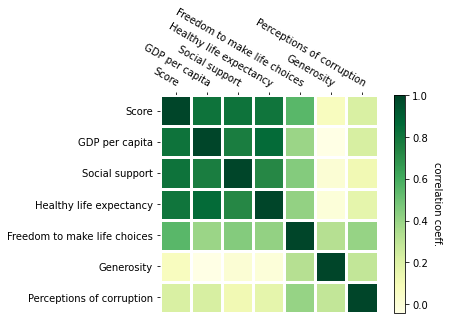

In [0]:
# set figure and axis 
fig, ax = plt.subplots()

column_names = cormatrix.columns.values
im, cbar = heatmap(cormatrix.values, column_names, cormatrix.columns.values, 
                   ax=ax, cmap="YlGn", cbarlabel="correlation coeff.")

Awesome, but what if we want to see the exact values in each square? Let's annotate the heatmap using the provided heatmap annotation function.

In [0]:
# a provided function to add annotations to a heatmap using matplotlib
# you don't need to understand how it works, just skim
def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts


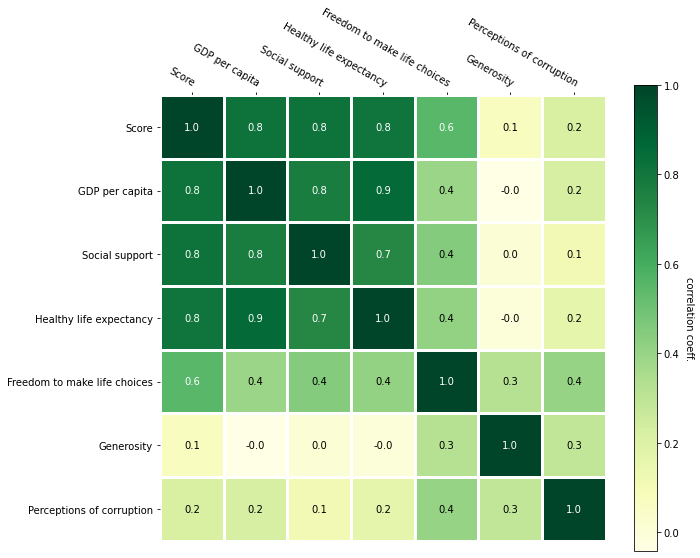

In [0]:
# set the figure size and axis 
fig, ax = plt.subplots(figsize=(10,8))

# draw heatmap
im, cbar = heatmap(cormatrix.values, column_names, cormatrix.columns.values, 
                   ax=ax, cmap="YlGn", cbarlabel="correlation coeff.")
# add annotations to heatmap
texts = annotate_heatmap(im, valfmt="{x:.1f}")

fig.tight_layout()
plt.show()

Correlation coefficient values are shown in each square. These values can range between -1 and 1 (but in this case they only range between 0 and 1). Values closer to -1 show a strong negative relationship with the "Happiness Score", while values closer to 1 show a strong positive relationship with the "Happiness Score". You can learn more about correlation coefficients [here](https://www.khanacademy.org/math/ap-statistics/bivariate-data-ap/correlation-coefficient-r/v/calculating-correlation-coefficient-r).

Since we are doing linear regression, we are most interested in variables that have a strong relationship in either the positive or negative direction. We can see that "GDP per capita", "Social support", and "Healthy life expectancy" show a strong positive relationship with "Happiness Score". We are doing single-variable linear regression, so we will only consider the relationship between "Happiness Score" and one strong positive variables rather than multiple variables. Therefore, let's explore the relationship between "Happiness Score" and "GDP per capita". We will build a simple linear regression model (i.e., a single-varable linear regression model) to better understand how "Happiness Score" is related to "GDP per capita". 

## Simple Linear Regression

Before we model the relationship between "Happiness Score" and "GDP per capita", let's write what we know about single-variable linear regression. In short, single-variable linear regression tries to find a line that best fits our data (i.e., between an x and y variable). It is defined by the following formula: 
$$
y = wx + b
$$

Coding linear regression from scratch can be tedious, fortunately, the `Sklearn` library comes with a built in package for linear regression in the `sklearn.linear_model` package under the `LinearRegression` module. We'll use this module to build a linear regression model to understand the relationship between the "Happiness Score" (i.e., the y variable) and the "GDP per capita" (i.e., the x variable).   

We'll use the following steps to build our model:
1. Define the x and y variables
2. Get the x and y data from our happiness dataframe
3. Create a linear regression model 
4. Fit the model to the x and y data
5. Create the line-of-best-fit for our data (i.e., the line defined by y = ax + b)
6. Create a scatter plot to showing the x and y data values and our model's line-of-best-fit. 
7. Measure how well our model explains the relationship between the x and y variables by calculating R^2 (also known as R-squared).


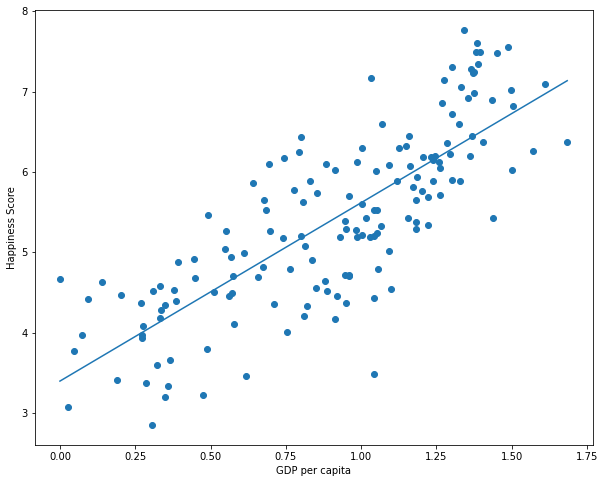

In [0]:
from sklearn.linear_model import LinearRegression

# 1. define the x and y variables 
x_col = 'GDP per capita'
y_col = 'Score'

# 2. get the x and y data from our dataframe
x = happy2019.loc[:, x_col].values
y = happy2019.loc[:, y_col].values

# 3. create the LinearRegression model object 
model = LinearRegression(fit_intercept=True)

# 4. fit the model with the x and y values  
model.fit(x[:, np.newaxis], y)

# 5. create the line-of-best-fit  
xfit = np.linspace(0, x.max(), 1000)
yfit = model.predict(xfit[:, np.newaxis])

# create a scatter plot of the x and y values and include the line-of-best-fit 
fig, ax = plt.subplots(figsize=(10,8))

# scatter plot of the x and y values
plt.scatter(x, y)
ax.set_ylabel('Happiness Score')
ax.set_xlabel('GDP per capita')

# add the line-of-best-fit
plt.plot(xfit, yfit);

After fitting a linear regression model, we need to determine how well the model fits our data. Does it do a good job of explaining changes in the dependent variable (i.e., the y variable)? To do this we will use the R^2, pronounced "R-squared" metric, which indicates  the percentage of the dependent variable variation that a linear model explains. The R-squared value can range between 0 and 1, where a value closer to one suggests that our model explains the relationship between x and y well, while the opposite is true when a value is closer to 0. There are limitations to R-squared, but that is beyond this lesson,
to learn more about R-squared see [here](https://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit).

In [0]:
# 7. measure how well our model explains the relationship between the x and y variables
# using R-squared
# R-squared ranges between 0 and 1, a value closer 1 suggests our mod
# After fitting a linear regression model, you need to determine how well the model fits the data. Does it do a good job of explaining changes in the dependent variable?
model.score(x[:, np.newaxis], y)

0.6302500079104005

The R-squared value is greater than 0.5, which suggests our model explains the relationship between "Happiness Score" and "GDP per capita" pretty well. As a result, we could use this model to predict Happiness scores for values between the GDP per capita range (i.e., 0 to 1.75) and be fairly confident in the predictions.